# Task 2: Unemployment Analysis using Python

## Objective
To analyze unemployment trends using Python and extract meaningful insights through data visualization.


In [3]:
import pandas as pd
import numpy as np 
import matplotlib as mlp 
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv(r"../data/task2/Unemployment_Rate_upto_11_2020.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [18]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [19]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [21]:
#check for missing values
df.isnull().sum()

#data types
df.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                           int64
 Estimated Labour Participation Rate (%)    float64
Region.1                                     object
longitude                                   float64
latitude                                    float64
dtype: object

In [23]:
df[' Frequency'].unique()
df[' Frequency'].value_counts()

 Frequency
M    267
Name: count, dtype: int64

In [24]:
# object to date conversion
df[' Date'] = pd.to_datetime(df[' Date'])
df.dtypes

C:\Users\niket\AppData\Local\Temp\ipykernel_11320\3541518002.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[' Date'] = pd.to_datetime(df[' Date'])


Region                                              object
 Date                                       datetime64[ns]
 Frequency                                          object
 Estimated Unemployment Rate (%)                   float64
 Estimated Employed                                  int64
 Estimated Labour Participation Rate (%)           float64
Region.1                                            object
longitude                                          float64
latitude                                           float64
dtype: object

In [ ]:
# removing extra spaces for the column names
df.columns = df.columns.str.strip()

# print columns names in different forms
#df.columns
#list(df.columns)
for col in df.columns:
    print(col)

Region
Date
Estimated Unemployment Rate (%)
Estimated Employed
Estimated Labour Participation Rate (%)
Region.1
longitude
latitude


In [ ]:
# dropping the frequency column as it has no variations in it, which is not neccessary for analysis.
df = df.drop(columns=['Frequency'])

In [ ]:
mon_unemp = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean()
mon_unemp.head()

Date
2020-06-30    10.911111
2020-07-31     9.834444
2020-08-31    10.313333
2020-09-30     8.705926
2020-10-31     8.026296
Name: Estimated Unemployment Rate (%), dtype: float64

In [41]:
mon_unemp.tail()

Date
2020-06-30    10.911111
2020-07-31     9.834444
2020-08-31    10.313333
2020-09-30     8.705926
2020-10-31     8.026296
Name: Estimated Unemployment Rate (%), dtype: float64

In [44]:
mon_unemp.shape
#df['Date'].nunique()


(10,)

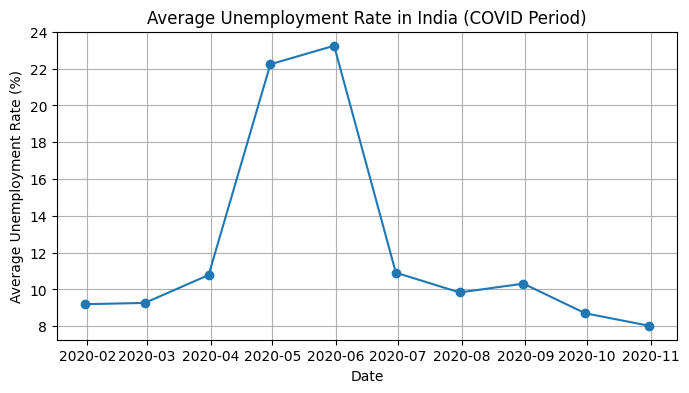

In [60]:
plt.figure(figsize=(8,4))
plt.plot(mon_unemp.index, mon_unemp.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Average Unemployment Rate (%)')
plt.title('Average Unemployment Rate in India (COVID Period)')
plt.grid(True)
plt.show()

In [62]:
zone_unemp = df.groupby('Region.1')['Estimated Unemployment Rate (%)'].mean()
zone_unemp


Region.1
East         13.916000
North        15.889620
Northeast    10.950263
South        10.454667
West          8.239000
Name: Estimated Unemployment Rate (%), dtype: float64

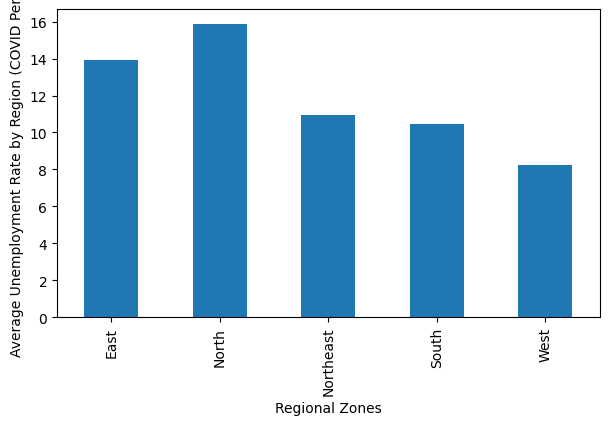

In [69]:
plt.figure(figsize=(7,4))
zone_unemp.plot(kind='bar')
plt.xlabel('Regional Zones')
plt.ylabel('Average Unemployment Rate by Region (COVID Period)')
plt.show()

## Conclusion
The analysis reveals that unemployment in India peaked during the early months of the COVID-19 pandemic and gradually declined as economic activities resumed. Region-wise analysis shows that the Northern region was the most affected, while the Western region experienced relatively lower unemployment. These variations highlight the uneven economic impact of the pandemic across regions and emphasize the role of industrial structure and workforce composition in recovery patterns.
